# PS5 Naive Bayes spam filter
Finished collectively by Anthony Zhang, Yixin Lyu, William Wang

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

## 1.
### 1.1

In [141]:
spam = pd.read_csv("../data/lingspam-emails.csv.bz2",
                 	sep = "\t")

In [142]:

is_spam = spam[spam['spam'] == True]
not_spam = spam[spam['spam'] == False]
spam_messages = is_spam[['message']].values
not_spam_messages = not_spam[['message']].values

print("non spam messages:")
for i, message in enumerate(not_spam_messages):
    if i >= 3: 
        break
    message_text = str(message[0])
    print("\n".join(wrap(message_text)), "\n")

print("spam messages:")
for i, message in enumerate(spam_messages):
    if i >= 3: 
        break
    message_text = str(message[0])
    print("\n".join(wrap(message_text)), "\n")

non spam messages:
Subject: re : 2 . 882 s - > np np  > date : sun , 15 dec 91 02 : 25 :
02 est > from : michael < mmorse @ vm1 . yorku . ca > > subject : re :
2 . 864 queries > > wlodek zadrozny asks if there is " anything
interesting " to be said > about the construction " s > np np " . . .
second , > and very much related : might we consider the construction
to be a form > of what has been discussed on this list of late as
reduplication ? the > logical sense of " john mcnamara the name " is
tautologous and thus , at > that level , indistinguishable from " well
, well now , what have we here ? " . to say that ' john mcnamara the
name ' is tautologous is to give support to those who say that a
logic-based semantics is irrelevant to natural language . in what
sense is it tautologous ? it supplies the value of an attribute
followed by the attribute of which it is the value . if in fact the
value of the name-attribute for the relevant entity were ' chaim
shmendrik ' , ' john mcnamara the

### 1.2

#### 1.

In [143]:
variable_naming_schemes = [
    ("Pr(S = 1)", "pr_spam_1"),
    ("Pr(S = 0)", "pr_spam_0"),
    ("Pr(w = 1)", "pr_word_1"),
    ("Pr(w = 0)", "pr_word_0"),
    ("Pr(w = 1|S = 1)", "pr_word_1_given_spam"),
    ("Pr(w = 0|S = 1)", "pr_word_0_given_spam"),
    ("Pr(w = 1|S = 0)", "pr_word_1_given_non_spam"),
    ("Pr(w = 0|S = 0)", "pr_word_0_given_non_spam"),
]

print(f"{'Probability':<30} {'Variable Name':<30}")
print("-" * 60)

for prob, var_name in variable_naming_schemes:
    print(f"{prob:<30} {var_name:<30}")

Probability                    Variable Name                 
------------------------------------------------------------
Pr(S = 1)                      pr_spam_1                     
Pr(S = 0)                      pr_spam_0                     
Pr(w = 1)                      pr_word_1                     
Pr(w = 0)                      pr_word_0                     
Pr(w = 1|S = 1)                pr_word_1_given_spam          
Pr(w = 0|S = 1)                pr_word_0_given_spam          
Pr(w = 1|S = 0)                pr_word_1_given_non_spam      
Pr(w = 0|S = 0)                pr_word_0_given_non_spam      


#### 2.

In [144]:
y = spam['spam']
y

0       False
1       False
2       False
3       False
4       False
        ...  
2888     True
2889     True
2890     True
2891     True
2892     True
Name: spam, Length: 2893, dtype: bool

In [145]:
def find_majority_class_bool(vector):
    return sum(vector) > len(vector) / 2
majority_class = find_majority_class_bool(y)
majority_class_text = "not-spam" if majority_class is False else "spam"
print(f"The majority class is: {majority_class_text}")

The majority class is: not-spam


In [146]:
predictions = np.full_like(y, fill_value=majority_class)
conf_matrix = confusion_matrix(y, predictions)

accuracy_naive = (conf_matrix[0][0] + conf_matrix[1][1] )/ sum(map(sum, conf_matrix))

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy of the naive estimator: {accuracy_naive * 100:.2f}%")

Confusion Matrix:
 [[2412    0]
 [ 481    0]]
Accuracy of the naive estimator: 83.37%


#### 3.

In [147]:
x = spam.message.str.lower().str.contains("million")
x

0       False
1       False
2       False
3       False
4       False
        ...  
2888    False
2889     True
2890    False
2891     True
2892     True
Name: message, Length: 2893, dtype: bool

#### 4.

In [148]:
pr_spam_1 = (spam['spam'] == True).mean()
pr_spam_0 = (spam['spam'] == False).mean()
print(f"Prior: probability of spam: {pr_spam_1*100:.2f}%, probability of non-spam: {pr_spam_0*100:.2f}%")

Prior: probability of spam: 16.63%, probability of non-spam: 83.37%


### 1.3
#### 1.

In [149]:
pr_word_1 = x.mean()
pr_word_0 = 1 - pr_word_1
print(f"Normalizer: probability of detecting target word: {pr_word_1*100:.2f}% , probability of not detecting target word: {pr_word_0*100:.2f}%")

Normalizer: probability of detecting target word: 4.84% , probability of not detecting target word: 95.16%


#### 2.

In [150]:
spam_with_x = spam.assign(contains_word_million = x)
spam_with_x.head(3)

,spam,files,message,contains_word_million
0,False,3-1msg1.txt,Subject: re : 2 . 882 s - > np np > date : su...,False
1,False,3-1msg2.txt,Subject: s - > np + np the discussion of s - ...,False
2,False,3-1msg3.txt,Subject: 2 . 882 s - > np np . . . for me it ...,False


In [151]:
pr_word_1_given_spam = spam_with_x[spam_with_x['spam'] == True]['contains_word_million'].mean()
pr_word_0_given_spam =  1 - pr_word_1_given_spam
pr_word_1_given_non_spam = spam_with_x[spam_with_x['spam'] == False]['contains_word_million'].mean()
pr_word_0_given_non_spam = 1 - pr_word_1_given_non_spam
print(f"Pr(w = 1|S = 1): {pr_word_1_given_spam*100:.2f}% , Pr(w = 0|S = 1): {pr_word_0_given_spam*100:.2f}%")
print(f"Pr(w = 1|S = 0): {pr_word_1_given_non_spam*100:.2f}% , Pr(w = 0|S = 0): {pr_word_0_given_non_spam*100:.2f}%")

Pr(w = 1|S = 1): 24.12% , Pr(w = 0|S = 1): 75.88%
Pr(w = 1|S = 0): 1.00% , Pr(w = 0|S = 0): 99.00%


#### 3.

In [152]:
pr_spam_given_word_1 = pr_word_1_given_spam  * pr_spam_1 / pr_word_1
pr_spam_given_word_0 = pr_word_0_given_spam  * pr_spam_1 / pr_word_0
print(f" Pr(S = 1|w = 1): {pr_spam_given_word_1*100:.2f}% , Pr(S = 1|w = 0): {pr_spam_given_word_0*100:.2f}%")

 Pr(S = 1|w = 1): 82.86% , Pr(S = 1|w = 0): 13.26%


In [153]:
pr_non_spam_given_word_1 = pr_word_1_given_non_spam  * pr_spam_0 / pr_word_1
pr_non_spam_given_word_0 = pr_word_0_given_non_spam  * pr_spam_0 / pr_word_0
print(f" Pr(S = 0|w = 1): {pr_non_spam_given_word_1*100:.2f}% , Pr(S = 0|w = 0): {pr_non_spam_given_word_0*100:.2f}%")

 Pr(S = 0|w = 1): 17.14% , Pr(S = 0|w = 0): 86.74%


#### 4.

In [154]:
print(f"Pr(S = 1|w = 1) + Pr(S = 0|w = 1) = {pr_spam_given_word_1 + pr_non_spam_given_word_1:.2f}")
print(f"Pr(S = 1|w = 0) + Pr(S = 0|w = 0) = {pr_spam_given_word_0 + pr_non_spam_given_word_0:.2f}")

Pr(S = 1|w = 1) + Pr(S = 0|w = 1) = 1.00
Pr(S = 1|w = 0) + Pr(S = 0|w = 0) = 1.00


The outcomes of a given occurrence that are exhaustive and mutually exclusive are represented by probabilities that add up to one. In this situation, Pr(S = 1|w = 1) and Pr(S = 0|w = 1) must add up to one since an email containing the term "million" can only be considered spam or not. Pr(S = 1|w = 0) and Pr(S = 0|w = 0) are equivalent. Probabilities like Pr(w = 1|S = 1) and Pr(w = 1|S = 0), on the other hand, do not have to add up to one since they do not represent all possible outcomes for a particular event. For example, an email including the word "million" may be considered spam, but so might any other word.

### 1.4
#### 1

In [155]:
predictions = pd.Series(index=spam_with_x.index, dtype='bool')
for index, row in spam_with_x.iterrows():
    if row['contains_word_million'] == True:
        predictions.at[index] = pr_spam_given_word_1 > 0.5
    else:
        predictions.at[index] = pr_spam_given_word_0 > 0.5
predictions

0       False
1       False
2       False
3       False
4       False
        ...  
2888    False
2889     True
2890    False
2891     True
2892     True
Length: 2893, dtype: bool

#### 2.

In [156]:
conf_matrix = confusion_matrix(y, predictions)

TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

accuracy_bays_theorem = (TN + TP )/ sum(map(sum, conf_matrix))
precision_bays_theorem = TP / (TP + FP)
recall_bays_theorem = TP / (TP + FN)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy of the bayes theorem estimator: {accuracy_bays_theorem * 100:.2f}%")
print(f"Precision of the bayes theorem estimator: {precision_bays_theorem :.2f}")
print(f"Recall of the bayes theorem estimator: {recall_bays_theorem:.2f}")

Confusion Matrix:
 [[2388   24]
 [ 365  116]]
Accuracy of the bayes theorem estimator: 86.55%
Precision of the bayes theorem estimator: 0.83
Recall of the bayes theorem estimator: 0.24


#### 3.
In the steps outlined above, the calculation of Bayes' theorem probabilities and the setting of a 0.5 threshold constitute the model's training. This is because the definition of a trained model is something from which we can make predictions. Our prediction was derived from the probabilities and the comparison between the threshold and the binary choice of whether the word is found or not, as described in the mentioned steps.

### 1.5
#### 1.

In [157]:
def bays_theorem_for_word(word):
    print(f"target word is {word}")
    spam = pd.read_csv("../data/lingspam-emails.csv.bz2",
                 	sep = "\t")
    x = spam.message.str.lower().str.contains(word)
    y = spam['spam']
    pr_spam_1 = (spam['spam'] == True).mean()
    pr_spam_0 = (spam['spam'] == False).mean()
    print(f"Prior: probability of spam: {pr_spam_1*100:.2f}%, probability of non-spam: {pr_spam_0*100:.2f}%")
    pr_word_1 = x.mean()
    pr_word_0 = 1 - pr_word_1
    print(f"Normalizer: probability of detecting target word: {pr_word_1*100:.2f}% , probability of not detecting target word: {pr_word_0*100:.2f}%")
    spam_with_x = spam.assign(contains_target_word = x)
    pr_word_1_given_spam = spam_with_x[spam_with_x['spam'] == True]['contains_target_word'].mean()
    pr_word_0_given_spam =  1 - pr_word_1_given_spam
    pr_word_1_given_non_spam = spam_with_x[spam_with_x['spam'] == False]['contains_target_word'].mean()
    pr_word_0_given_non_spam = 1 - pr_word_1_given_non_spam
    print(f"Pr(w = 1|S = 1): {pr_word_1_given_spam*100:.2f}% , Pr(w = 0|S = 1): {pr_word_0_given_spam*100:.2f}%")
    print(f"Pr(w = 1|S = 0): {pr_word_1_given_non_spam*100:.2f}% , Pr(w = 0|S = 0): {pr_word_0_given_non_spam*100:.2f}%")
    
    pr_spam_given_word_1 = pr_word_1_given_spam  * pr_spam_1 / pr_word_1
    pr_spam_given_word_0 = pr_word_0_given_spam  * pr_spam_1 / pr_word_0
    print(f" Pr(S = 1|w = 1): {pr_spam_given_word_1*100:.2f}% , Pr(S = 1|w = 0): {pr_spam_given_word_0*100:.2f}%")
    
    pr_non_spam_given_word_1 = pr_word_1_given_non_spam  * pr_spam_0 / pr_word_1
    pr_non_spam_given_word_0 = pr_word_0_given_non_spam  * pr_spam_0 / pr_word_0
    print(f" Pr(S = 0|w = 1): {pr_non_spam_given_word_1*100:.2f}% , Pr(S = 0|w = 0): {pr_non_spam_given_word_0*100:.2f}%")
    predictions = pd.Series(index=spam_with_x.index, dtype='bool')
    for index, row in spam_with_x.iterrows():
        if row['contains_target_word'] == True:
            predictions.at[index] = pr_spam_given_word_1 > 0.5
        else:
            predictions.at[index] = pr_spam_given_word_0 > 0.5
    from sklearn.metrics import confusion_matrix, accuracy_score
    conf_matrix = confusion_matrix(y, predictions)
    print("Confusion Matrix:\n", conf_matrix)
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    accuracy_bays_theorem = (TN + TP )/ (TP + TN + FP + FN)#  sum(map(sum, conf_matrix))
    print(f"Accuracy of the bayes theorem estimator for word '{word}': {accuracy_bays_theorem * 100:.2f}%")

    precision_bays_theorem = TP / (TP + FP)
    recall_bays_theorem = TP / (TP + FN)
    print(f"Precision of the bayes theorem estimator for word '{word}': {precision_bays_theorem :.2f}")
    print(f"Recall of the bayes theorem estimator for word '{word}': {recall_bays_theorem:.2f}")
   
        
   

In [158]:
bays_theorem_for_word("conference")

target word is conference
Prior: probability of spam: 16.63%, probability of non-spam: 83.37%
Normalizer: probability of detecting target word: 23.37% , probability of not detecting target word: 76.63%
Pr(w = 1|S = 1): 1.04% , Pr(w = 0|S = 1): 98.96%
Pr(w = 1|S = 0): 27.82% , Pr(w = 0|S = 0): 72.18%
 Pr(S = 1|w = 1): 0.74% , Pr(S = 1|w = 0): 21.47%
 Pr(S = 0|w = 1): 99.26% , Pr(S = 0|w = 0): 78.53%
Confusion Matrix:
 [[2412    0]
 [ 481    0]]
Accuracy of the bayes theorem estimator for word 'conference': 83.37%
Precision of the bayes theorem estimator for word 'conference': nan
Recall of the bayes theorem estimator for word 'conference': 0.00


/tmp/ipykernel_129/1939851048.py:45: RuntimeWarning: invalid value encountered in scalar divide
  precision_bays_theorem = TP / (TP + FP)


In [159]:
bays_theorem_for_word("the")

target word is the
Prior: probability of spam: 16.63%, probability of non-spam: 83.37%
Normalizer: probability of detecting target word: 97.27% , probability of not detecting target word: 2.73%
Pr(w = 1|S = 1): 93.56% , Pr(w = 0|S = 1): 6.44%
Pr(w = 1|S = 0): 98.01% , Pr(w = 0|S = 0): 1.99%
 Pr(S = 1|w = 1): 15.99% , Pr(S = 1|w = 0): 39.24%
 Pr(S = 0|w = 1): 84.01% , Pr(S = 0|w = 0): 60.76%
Confusion Matrix:
 [[2412    0]
 [ 481    0]]
Accuracy of the bayes theorem estimator for word 'the': 83.37%
Precision of the bayes theorem estimator for word 'the': nan
Recall of the bayes theorem estimator for word 'the': 0.00


/tmp/ipykernel_129/1939851048.py:45: RuntimeWarning: invalid value encountered in scalar divide
  precision_bays_theorem = TP / (TP + FP)


In [160]:
bays_theorem_for_word("dollar")

target word is dollar
Prior: probability of spam: 16.63%, probability of non-spam: 83.37%
Normalizer: probability of detecting target word: 4.29% , probability of not detecting target word: 95.71%
Pr(w = 1|S = 1): 19.96% , Pr(w = 0|S = 1): 80.04%
Pr(w = 1|S = 0): 1.16% , Pr(w = 0|S = 0): 98.84%
 Pr(S = 1|w = 1): 77.42% , Pr(S = 1|w = 0): 13.90%
 Pr(S = 0|w = 1): 22.58% , Pr(S = 0|w = 0): 86.10%
Confusion Matrix:
 [[2384   28]
 [ 385   96]]
Accuracy of the bayes theorem estimator for word 'dollar': 85.72%
Precision of the bayes theorem estimator for word 'dollar': 0.77
Recall of the bayes theorem estimator for word 'dollar': 0.20


In [161]:
bays_theorem_for_word("lottery")

target word is lottery
Prior: probability of spam: 16.63%, probability of non-spam: 83.37%
Normalizer: probability of detecting target word: 0.83% , probability of not detecting target word: 99.17%
Pr(w = 1|S = 1): 4.99% , Pr(w = 0|S = 1): 95.01%
Pr(w = 1|S = 0): 0.00% , Pr(w = 0|S = 0): 100.00%
 Pr(S = 1|w = 1): 100.00% , Pr(S = 1|w = 0): 15.93%
 Pr(S = 0|w = 1): 0.00% , Pr(S = 0|w = 0): 84.07%
Confusion Matrix:
 [[2412    0]
 [ 457   24]]
Accuracy of the bayes theorem estimator for word 'lottery': 84.20%
Precision of the bayes theorem estimator for word 'lottery': 1.00
Recall of the bayes theorem estimator for word 'lottery': 0.05


#### 2.
the overall performance is good. All four accuracy for the words "conference", "the", "dollar" and "lottery" is between 83% to 85%. The recall for "confernce” and "the" is 0, "lottery" is 0.05 and "dollar" is 0.2. The precision for "conference" and "the" is 0, "dollar" is 0.77 and "lottery" is 1.0.

#### 3.
 A low recall in this case means the the model can't relaly correctly identify relevant data points. This is probabily becuase words like "conference" and "the" is not a reliable indicator of if the email is spam or not, so we use them to identify spam emails, we will miss a lot of emails. From another perspective, the word "lottery" is a reliable indicator for spam, but it appears in too little emails, which makes it not representive of a typical spam email in the data set. The closest we get is the word "dollars", which has a relativly good appearance, thus roducing the highest recall out all the words we tested.

#### 4.
a) "million" improves accuarcy because it is frequently linked to contents of spam emails.

b) "conference" does not work becuase it is used in many non-spam emails, such as reputable academic emails, so it does not really work in this case.

c) The word "the" is not working because it is a word almost if not all email uses. So the model can't really predict anything based on that word. The confusion matrix in this case will show all negative, this is becuase it is reflecting the value of the prior (probability of non-spam). The prior in here 83.37%. This is becuase both the normalizer and the PR(W|S) rendered useless because of how common the word is.

d) Both "dollar" and "lottery" works because it is often used in the context of "spam emails"

## 2.
### 2.1
#### 1.

In [162]:
vectorizer = CountVectorizer(binary=True) # only 1/0 for the word presence!
# define vectorizer
X = vectorizer.fit_transform(spam.message)
# vectorize your data. Note: this creates a sparse matrix,
# use .toarray() if you run into trouble
vocabulary = vectorizer.get_feature_names_out()
# in case you want to see what are the actual words

In [163]:
print(f"There is {X.shape[0]} document with {X.shape[1]} tokens")

There is 2893 document with 60925 tokens


#### 2.

In [164]:
X[982:985, 40041:40046].toarray()

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0]])

In [165]:
dtm = pd.DataFrame(X.toarray(),
        	columns=vocabulary)
excerpt = dtm.iloc[982:985, 40041:40046]
excerpt

,nooteboom,nootka,nope,nor,nora
982,0,0,0,0,0
983,0,1,0,1,0
984,0,0,0,0,0


a) The rows shows three emails, which is the 982th, the 982th, and the 984th.

b) The words are nooteboom,	nootka,	nope,	nor, nora

c) The 1s in the middle of the table means that this document contains this word

d) The zeros means that this document does not contains this word

#### 3.

In [166]:
Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2)

#### 4.

In [167]:
variable_naming_schemes = [
    ("log Pr(W = 1)", "log_pr_word_1"),
    ("ℓ(S = 1|W)", "likelihood_pr_spam_given_word_1"),
]

print(f"{'Probability':<30} {'Variable Name':<30}")
print("-" * 60)

for prob, var_name in variable_naming_schemes:
    print(f"{prob:<30} {var_name:<30}")

Probability                    Variable Name                 
------------------------------------------------------------
log Pr(W = 1)                  log_pr_word_1                 
ℓ(S = 1|W)                     likelihood_pr_spam_given_word_1


The reason why we named the values like this is to ensure maximum clarity and readability

### 2.2
#### 1.

In [168]:
pr_spam_1 = yt.mean()
pr_spam_0 = 1 - pr_spam_1
log_pr_spam_1 = np.log(pr_spam_1)
log_pr_spam_1

-1.8305308451461868

In [169]:
log_pr_spam_0 = np.log(pr_spam_0)
log_pr_spam_0

-0.17474445837618183

#### 2.

In [170]:
num_spam = np.sum(yt == True)
num_non_spam = np.sum(yt == False)

In [171]:
X_spam = Xt[yt == True, :]
X_non_spam = Xt[yt == False, :]
word_counts_spam = np.sum(X_spam, axis=0)
word_counts_non_spam = np.sum(X_non_spam, axis=0)
word_counts_non_spam

matrix([[325, 104,   1, ...,   0,   0,   1]])

In [172]:
Pr_word_1_spam_1 = word_counts_spam / num_spam
Pr_word_1_spam_0 = word_counts_non_spam / num_non_spam

log_Pr_word_1_spam_1 = np.log(Pr_word_1_spam_1)
log_Pr_word_1_spam_0 = np.log(Pr_word_1_spam_0)
log_Pr_word_1_spam_1

/tmp/ipykernel_129/678780346.py:4: RuntimeWarning: divide by zero encountered in log
  log_Pr_word_1_spam_1 = np.log(Pr_word_1_spam_1)
/tmp/ipykernel_129/678780346.py:5: RuntimeWarning: divide by zero encountered in log
  log_Pr_word_1_spam_0 = np.log(Pr_word_1_spam_0)


matrix([[-1.14551744, -1.15402813, -5.91620206, ...,        -inf,
         -5.91620206,        -inf]])

#### 4.

In [173]:
print(f"Pr(W = 1|S = 0)'s have {log_Pr_word_1_spam_0.shape[0]} rows, {log_Pr_word_1_spam_0.shape[1]} columns")
print(f"Pr(W = 1|S = 1)'s have {log_Pr_word_1_spam_1.shape[0]} rows, {log_Pr_word_1_spam_1.shape[1]} columns")
print("They are the same becuase they all each represent the log of probability of the word given a condition of spam of non-spam, so they will match the number of words fond in the dataset")

Pr(W = 1|S = 0)'s have 1 rows, 60925 columns
Pr(W = 1|S = 1)'s have 1 rows, 60925 columns
They are the same becuase they all each represent the log of probability of the word given a condition of spam of non-spam, so they will match the number of words fond in the dataset


### 2.3
#### 1.

In [174]:
log_Pr_word_1_spam_1 = log_Pr_word_1_spam_1.reshape(-1, 1)
log_Pr_word_1_spam_0 = log_Pr_word_1_spam_0.reshape(-1, 1)

In [175]:
likelihood_pr_spam_given_word_1 = Xv @ log_Pr_word_1_spam_1 + log_pr_spam_1
likelihood_pr_spam_given_word_0 = Xv @ log_Pr_word_1_spam_0 + log_pr_spam_0

#### 2.

In [176]:
print(f"I got {likelihood_pr_spam_given_word_1.shape[0]} log-likelihoods, this is because it is just the number of rows found in the validation dataset, which is also {Xv.shape[0]}")

I got 579 log-likelihoods, this is because it is just the number of rows found in the validation dataset, which is also 579


#### 3.

In [177]:
predictions = np.where(likelihood_pr_spam_given_word_1 > likelihood_pr_spam_given_word_0, True, False)

#### 4.

In [178]:
naive_bay_conf_matrix = confusion_matrix(yv, predictions)
naive_bayes_accuracy = accuracy_score(yv, predictions)
print("Confusion Matrix for naive bayes:\n", naive_bay_conf_matrix)
print(f"Accuracy score for naive bayes: {naive_bayes_accuracy*100:.2f}%")

Confusion Matrix for naive bayes:
 [[469   0]
 [101   9]]
Accuracy score for naive bayes: 82.56%


#### 5.

This is because the likelihood metrix contains a lot of infinities. These infinities are there becuase of the many 0s we get from the calculated the probabilities vectors in Pr_word_1_spam_0 and Pr_word_1_spam_1. These infinities don't actually tell the model any useful information, thus disrupting its proformance and lower the its accuracy.

### 2.4
#### 1.

In [179]:
def fit_NB(Xt, yt, Xv, yv, alpha):
    num_spam = np.sum(yt == True)
    num_non_spam = np.sum(yt == False)

    X_spam = Xt[yt == True, :]
    X_non_spam = Xt[yt == False, :]
    word_counts_spam = np.sum(X_spam, axis=0)
    word_counts_non_spam = np.sum(X_non_spam, axis=0)

    Pr_word_1_spam_1 = word_counts_spam / num_spam
    Pr_word_1_spam_0 = word_counts_non_spam / num_non_spam

    log_Pr_word_1_spam_1 = np.log(Pr_word_1_spam_1)
    log_Pr_word_1_spam_0 = np.log(Pr_word_1_spam_0)

    log_Pr_word_1_spam_1 = log_Pr_word_1_spam_1.reshape(-1, 1)
    log_Pr_word_1_spam_0 = log_Pr_word_1_spam_0.reshape(-1, 1)

    likelihood_pr_spam_given_word_1 = Xv @ log_Pr_word_1_spam_1 + log_pr_spam_1
    likelihood_pr_spam_given_word_0 = Xv @ log_Pr_word_1_spam_0 + log_pr_spam_0
    return (likelihood_pr_spam_given_word_1, likelihood_pr_spam_given_word_0)

def predict_NB(likelihood_pr_spam_given_word_1, likelihood_pr_spam_given_word_0):
    predictions = np.where(likelihood_pr_spam_given_word_1 > likelihood_pr_spam_given_word_0, True, False)

#### 2.

In [180]:
def fit_NB_with_smoothing(Xt, yt, Xv, yv, alpha):
    num_spam = np.sum(yt == True)
    num_non_spam = np.sum(yt == False)

    X_spam = Xt[yt == True, :]
    X_non_spam = Xt[yt == False, :]
    word_counts_spam = np.sum(X_spam, axis=0) + alpha #<- added alpha here
    word_counts_non_spam = np.sum(X_non_spam, axis=0) + alpha #<- added alpha here

    Pr_word_1_spam_1 = word_counts_spam / (num_spam + 2 * alpha) #<- added alpha here
    Pr_word_1_spam_0 = word_counts_non_spam / (num_non_spam + 2 * alpha) #<- added alpha here

    log_Pr_word_1_spam_1 = np.log(Pr_word_1_spam_1)
    log_Pr_word_1_spam_0 = np.log(Pr_word_1_spam_0)

    log_Pr_word_1_spam_1 = log_Pr_word_1_spam_1.reshape(-1, 1)
    log_Pr_word_1_spam_0 = log_Pr_word_1_spam_0.reshape(-1, 1)

    likelihood_pr_spam_given_word_1 = Xv @ log_Pr_word_1_spam_1 + log_pr_spam_1
    likelihood_pr_spam_given_word_0 = Xv @ log_Pr_word_1_spam_0 + log_pr_spam_0
    return [likelihood_pr_spam_given_word_1, likelihood_pr_spam_given_word_0]

def predict_NB_with_smoothing(likelihood_pr_spam_given_word_1, likelihood_pr_spam_given_word_0):
    predictions = np.where(likelihood_pr_spam_given_word_1 > likelihood_pr_spam_given_word_0, True, False)
    return predictions

#### 3.

In [181]:
alpha_values = [10**i for i in range(-8, 1)]
accuracy_with_smoothing = []

for alpha in alpha_values:
    likelihoods = fit_NB_with_smoothing(Xt, yt, Xv, yv, alpha)
    predictions = predict_NB_with_smoothing(likelihoods[0], likelihoods[1])
    accuracy = accuracy_score(yv, predictions)
    accuracy_with_smoothing.append(accuracy)
    print(f'Alpha: {alpha}, Accuracy: {accuracy}')

Alpha: 1e-08, Accuracy: 0.9792746113989638
Alpha: 1e-07, Accuracy: 0.9861830742659758
Alpha: 1e-06, Accuracy: 0.9896373056994818
Alpha: 1e-05, Accuracy: 0.9913644214162349
Alpha: 0.0001, Accuracy: 0.9948186528497409
Alpha: 0.001, Accuracy: 0.9965457685664939
Alpha: 0.01, Accuracy: 0.998272884283247
Alpha: 0.1, Accuracy: 0.9948186528497409
Alpha: 1, Accuracy: 0.9153713298791019


#### 4.

In [182]:
best_alpha = alpha_values[np.argmax(accuracy_with_smoothing)]
print(f"the best alpha value is {best_alpha}")

the best alpha value is 0.01


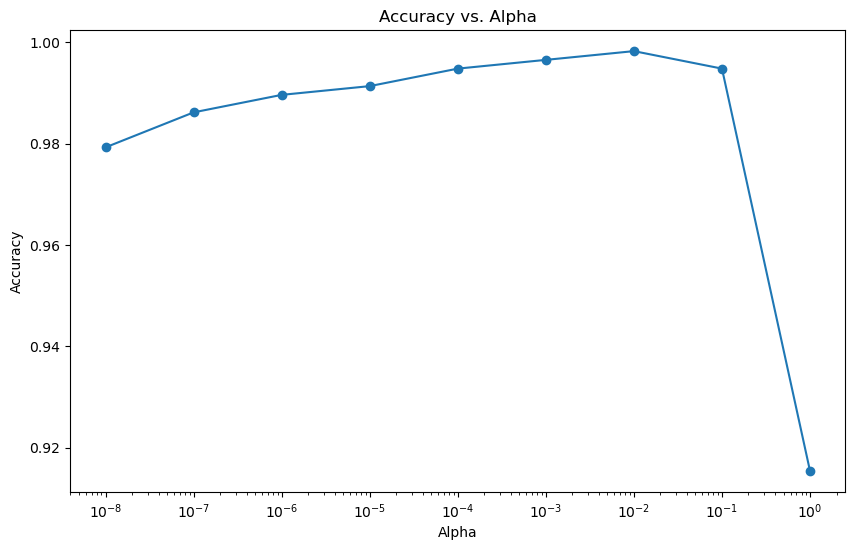

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, accuracy_with_smoothing, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha')
plt.show()

## 3
### 1.

The actual values are the number for the manual review, which is 437 cases of Firearm related cases and 4953 cases of non-firearm related cases.

The predicted values are the number under the criminal code, which is 77 cases of Firearm-related cases and 5313 cases of non-firearm related cases.

### 2.

The actual values (manual reviews) are in rows.

### 3.
The CM has positive value first. The positive values is cases that are firearm related.

### 4.
There are 0 false positive cases and 360 false negative cases.

### 5.

In [184]:
TP = 77  # True Positives
TN = 4953  # True Negatives
FN = 360  # False Negatives
FP = 0  # False Positives 

cm_rearranged = [[TN, FP], [FN, TP]]
print(cm_rearranged[0])
print(cm_rearranged[1])

[4953, 0]
[360, 77]


#### 6.
NPV stands negative predictive value. It has a value of 93.2% means that when the criminal codes predict a case as not firearm-related, there's a 93.2% chance that this prediction is correct.

Se means sensitivity. It has a value of 17.6% means that of all actual firearm-related cases, the criminal codes correctly identified 17.6% of them.

### 7.

In [185]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)  
f_score = 2 * (precision * recall) / (precision + recall)
print(f"the precision is {precision}, the recall is {recall}, the f_score is {f_score}")

the precision is 1.0, the recall is 0.17620137299771166, the f_score is 0.29961089494163423


The github link for this project is https://github.com/Antzed/INFO-371-PS5-Naive-Bayes-spam-filter-

We spend approximatly 20 hours on this assignment